## Importando as bibliotecas necessárias

Agora, vamos importar as bibliotecas necessárias:

In [1]:
# Para utilizar recursos do sistema
import os
import sys

# Bibliotecas DASK
import dask
from dask.distributed import Client
import dask.dataframe as dd # similar ao pandas
import dask.multiprocessing

# Para plot
%matplotlib inline
import matplotlib.pyplot as plt

Caso obtenha algum erro, utilize o **!pip install** para instalar a biblioteca ausente!

Vamos conferir com qual versão da biblioteca **Dask** estamos trabalhando?

In [2]:
dask.__version__

'2022.10.0'

Você também pode conferir de onde está executando o Python e qual a versão

In [4]:
print('Executável:')
print(sys.executable)

print('\nVersão do Python:')
print(sys.version)

Executável:
c:\Users\davi.souza\Desktop\Personal\projeto-1-redesoc\venv\Scripts\python.exe

Versão do Python:
3.8.10 (tags/v3.8.10:3d8993a, May  3 2021, 11:48:03) [MSC v.1928 64 bit (AMD64)]


Vamos conferir em qual diretório iremos trabalhar (é o diretório do notebook)

In [5]:
print('O seu notebook está na pasta:')
print(os.getcwd())

O seu notebook está na pasta:
c:\Users\davi.souza\Desktop\Personal\projeto-1-redesoc


## Configurando um ambiente Dask

Agora iremos configurar um ambiente Dask para execução das nossas análises. Para isso, iremos criar um **client**

In [6]:
client = Client(n_workers=4, threads_per_worker=2, memory_limit='2GB')

perceba que, ao exibir o client, temos acesso a uma URL que nos permitirá acompanhar informações sobre o consumo de recursos durante a execução de tarefas

In [7]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 7.45 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:51626,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 7.45 GiB
Comm: tcp://127.0.0.1:51668,Total threads: 2
Dashboard: http://127.0.0.1:51669/status,Memory: 1.86 GiB
Nanny: tcp://127.0.0.1:51632,


In [8]:
reviews = dd.read_csv('steam_reviews.csv',
                      sep=',',
                      encoding='UTF-8',
                      on_bad_lines='skip',
                      engine='python',
                     dtype={'Unnamed: 0': 'object',
                           'app_id': 'object',
                           'author.num_games_owned': 'object',
                           'author.num_reviews': 'object',
                           'author.steamid': 'object',
                           'review_id': 'object',
                            'recommended': 'bool',
                           'timestamp_created': 'object',
                           'timestamp_updated': 'object',
                           'comment_count': 'object',
                           'weighted_vote_score': 'object',
                           'votes_funny': 'object',
                           'votes_helpful': 'object'})

## Amostra dos dados

Semelhante ao Pandas, podemos solicitar uma pequena amostra dos dados com

In [9]:
reviews = reviews.drop(["Unnamed: 0"], axis=1)
reviews.head(5)

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


In [10]:
reviews.dtypes

app_id                             object
app_name                           object
review_id                          object
language                           object
review                             object
timestamp_created                  object
timestamp_updated                  object
recommended                          bool
votes_helpful                      object
votes_funny                        object
weighted_vote_score                object
comment_count                      object
steam_purchase                       bool
received_for_free                    bool
written_during_early_access          bool
author.steamid                     object
author.num_games_owned             object
author.num_reviews                 object
author.playtime_forever           float64
author.playtime_last_two_weeks    float64
author.playtime_at_review         float64
author.last_played                float64
dtype: object

In [11]:
reviews_ptbr = reviews[reviews.language == 'brazilian']
reviews_ptbr.head(5)

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
29,292030,The Witcher 3: Wild Hunt,85177505,brazilian,Se um dia alguém falar que esse jogo é ruim na...,1611368498,1611368498,True,1,0,...,True,False,False,76561198844659805,70,4,11115.0,2252.0,11115.0,1.611186e+09
32,292030,The Witcher 3: Wild Hunt,85176661,brazilian,NaN,1611367193,1611367193,True,0,0,...,True,False,False,76561198076880796,127,13,875.0,752.0,826.0,1.611370e+09
34,292030,The Witcher 3: Wild Hunt,85176249,brazilian,Obra prima!!!,1611366524,1611366524,True,0,0,...,True,False,False,76561198957873353,32,1,2888.0,1475.0,2888.0,1.611366e+09
43,292030,The Witcher 3: Wild Hunt,85173023,brazilian,Jogão da porra.,1611361229,1611361229,True,0,0,...,True,False,False,76561198141110905,59,4,20193.0,3692.0,20193.0,1.611297e+09
48,292030,The Witcher 3: Wild Hunt,85172417,brazilian,very foda,1611360271,1611360271,True,0,0,...,True,False,False,76561198107351100,60,5,2104.0,2037.0,1882.0,1.611386e+09


In [12]:
reviews_ptbr['timestamp_created'] = dd.to_datetime(reviews_ptbr['timestamp_created'], unit='s')
reviews_ptbr['timestamp_updated'] = dd.to_datetime(reviews_ptbr['timestamp_updated'], unit='s')
reviews_ptbr.head(5)

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
29,292030,The Witcher 3: Wild Hunt,85177505,brazilian,Se um dia alguém falar que esse jogo é ruim na...,2021-01-23 02:21:38,2021-01-23 02:21:38,True,1,0,...,True,False,False,76561198844659805,70,4,11115.0,2252.0,11115.0,1.611186e+09
32,292030,The Witcher 3: Wild Hunt,85176661,brazilian,NaN,2021-01-23 01:59:53,2021-01-23 01:59:53,True,0,0,...,True,False,False,76561198076880796,127,13,875.0,752.0,826.0,1.611370e+09
34,292030,The Witcher 3: Wild Hunt,85176249,brazilian,Obra prima!!!,2021-01-23 01:48:44,2021-01-23 01:48:44,True,0,0,...,True,False,False,76561198957873353,32,1,2888.0,1475.0,2888.0,1.611366e+09
43,292030,The Witcher 3: Wild Hunt,85173023,brazilian,Jogão da porra.,2021-01-23 00:20:29,2021-01-23 00:20:29,True,0,0,...,True,False,False,76561198141110905,59,4,20193.0,3692.0,20193.0,1.611297e+09
48,292030,The Witcher 3: Wild Hunt,85172417,brazilian,very foda,2021-01-23 00:04:31,2021-01-23 00:04:31,True,0,0,...,True,False,False,76561198107351100,60,5,2104.0,2037.0,1882.0,1.611386e+09


In [13]:
reviews_april = reviews_ptbr[reviews_ptbr['timestamp_created'].dt.month == 4]
reviews_april.head(5)

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
110711,292030,The Witcher 3: Wild Hunt,68330832,brazilian,"Jogo excelente em todas as mecânicas, gráficos...",2020-04-30 23:52:54,2020-04-30 23:52:54,True,0,0,...,True,False,False,76561198159239276,26,2,9640.0,0.0,9009.0,1.588377e+09
110719,292030,The Witcher 3: Wild Hunt,68329511,brazilian,o jogo é pika,2020-04-30 23:19:24,2020-04-30 23:19:24,True,0,0,...,True,False,False,76561198043602884,34,6,10299.0,0.0,2568.0,1.606605e+09
110722,292030,The Witcher 3: Wild Hunt,68328796,brazilian,Nice,2020-04-30 23:01:10,2020-04-30 23:01:10,True,0,0,...,True,False,False,76561198134272383,21,5,783.0,0.0,619.0,1.609530e+09
110728,292030,The Witcher 3: Wild Hunt,68327598,brazilian,muito bom,2020-04-30 22:30:41,2020-04-30 22:30:41,True,0,0,...,True,False,False,76561199006967739,12,2,5922.0,0.0,5533.0,1.590269e+09
110739,292030,The Witcher 3: Wild Hunt,68325545,brazilian,"Temática e história ricas de detalhes, um bom ...",2020-04-30 21:42:55,2020-04-30 21:42:55,True,0,0,...,True,False,False,76561198062670500,36,1,5192.0,0.0,1514.0,1.589417e+09


In [14]:
reviews_april.dtypes

app_id                                    object
app_name                                  object
review_id                                 object
language                                  object
review                                    object
timestamp_created                 datetime64[ns]
timestamp_updated                 datetime64[ns]
recommended                                 bool
votes_helpful                             object
votes_funny                               object
weighted_vote_score                       object
comment_count                             object
steam_purchase                              bool
received_for_free                           bool
written_during_early_access                 bool
author.steamid                            object
author.num_games_owned                    object
author.num_reviews                        object
author.playtime_forever                  float64
author.playtime_last_two_weeks           float64
author.playtime_at_r

In [15]:
# convert reviews_april to pd.DataFrame
reviews_april_pd = reviews_april.compute()
reviews_april_pd.head(5)

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
110711,292030,The Witcher 3: Wild Hunt,68330832,brazilian,"Jogo excelente em todas as mecânicas, gráficos...",2020-04-30 23:52:54,2020-04-30 23:52:54,True,0,0,...,True,False,False,76561198159239276,26,2,9640.0,0.0,9009.0,1.588377e+09
110719,292030,The Witcher 3: Wild Hunt,68329511,brazilian,o jogo é pika,2020-04-30 23:19:24,2020-04-30 23:19:24,True,0,0,...,True,False,False,76561198043602884,34,6,10299.0,0.0,2568.0,1.606605e+09
110722,292030,The Witcher 3: Wild Hunt,68328796,brazilian,Nice,2020-04-30 23:01:10,2020-04-30 23:01:10,True,0,0,...,True,False,False,76561198134272383,21,5,783.0,0.0,619.0,1.609530e+09
110728,292030,The Witcher 3: Wild Hunt,68327598,brazilian,muito bom,2020-04-30 22:30:41,2020-04-30 22:30:41,True,0,0,...,True,False,False,76561199006967739,12,2,5922.0,0.0,5533.0,1.590269e+09
110739,292030,The Witcher 3: Wild Hunt,68325545,brazilian,"Temática e história ricas de detalhes, um bom ...",2020-04-30 21:42:55,2020-04-30 21:42:55,True,0,0,...,True,False,False,76561198062670500,36,1,5192.0,0.0,1514.0,1.589417e+09


In [16]:
# reviews_april_pd to csv
reviews_april_pd.to_csv('reviews_april.csv', index=False)

In [17]:
# convert reviews_ptbr to pd.DataFrame
reviews_ptbr_pd = reviews_ptbr.compute()
reviews_ptbr_pd.head(5)

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
29,292030,The Witcher 3: Wild Hunt,85177505,brazilian,Se um dia alguém falar que esse jogo é ruim na...,2021-01-23 02:21:38,2021-01-23 02:21:38,True,1,0,...,True,False,False,76561198844659805,70,4,11115.0,2252.0,11115.0,1.611186e+09
32,292030,The Witcher 3: Wild Hunt,85176661,brazilian,NaN,2021-01-23 01:59:53,2021-01-23 01:59:53,True,0,0,...,True,False,False,76561198076880796,127,13,875.0,752.0,826.0,1.611370e+09
34,292030,The Witcher 3: Wild Hunt,85176249,brazilian,Obra prima!!!,2021-01-23 01:48:44,2021-01-23 01:48:44,True,0,0,...,True,False,False,76561198957873353,32,1,2888.0,1475.0,2888.0,1.611366e+09
43,292030,The Witcher 3: Wild Hunt,85173023,brazilian,Jogão da porra.,2021-01-23 00:20:29,2021-01-23 00:20:29,True,0,0,...,True,False,False,76561198141110905,59,4,20193.0,3692.0,20193.0,1.611297e+09
48,292030,The Witcher 3: Wild Hunt,85172417,brazilian,very foda,2021-01-23 00:04:31,2021-01-23 00:04:31,True,0,0,...,True,False,False,76561198107351100,60,5,2104.0,2037.0,1882.0,1.611386e+09


In [18]:
# reviews_ptbr_pd to csv
reviews_ptbr_pd.to_csv('reviews_ptbr.csv', index=False)

ou com

### Dicionário de Dados

Outra dificuldade bastante comum ao trabalharmos com novas bases de dados, sejam bases públicas ou mesmo em um ambiente empresarial, é entender os dados ali representados.

A ideia do uso de técnicas de análise de dados é:
- A partir de um problema (pergunta)
- Conseguir dados (variáveis)
- Analisar dados e responder pergunta (modelos de Machine Learning, Gráficos, estatísticas, Dashboard)

Então, por exemplo, a partir da indagação da área de negócios de um banco: **"*alguns clientes que realizaram empréstimos comigo não estão honrando os pagamentos e eu não sei o motivo*"**

Poderíamos tentar utilizar o histórico de dados de empréstimo para tentar entender o que leva uma empresa a não honrar o pagamento de um empréstimo. O dicionário de dados seria o recurso inicial que nos ajudaria a entender a base.

Dicionário de dados exemplo:
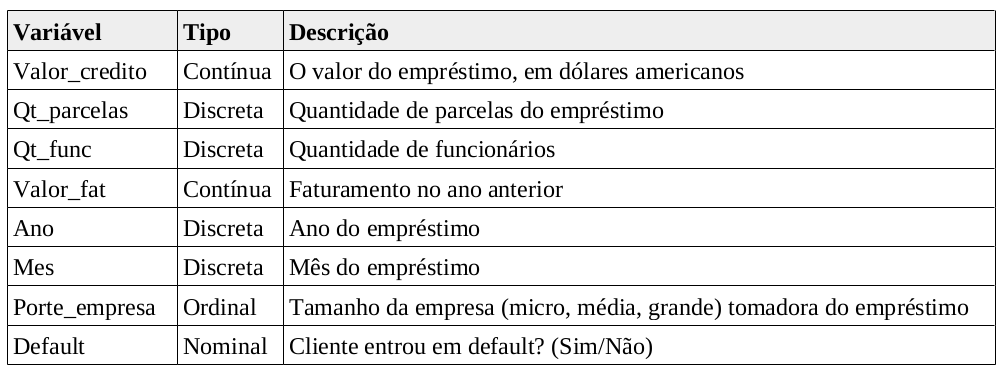

## Inferência do Schema

Uma das grandes desvantagens dos arquivos CSV é que não há definição de tipo dos dados das colunas. Os tipos são inferidos automaticamente pelo Dask e podem ser verificados com:

In [ ]:
dados_sp.dtypes

## Quantidade de registros

Podemos contar quantas linhas estão no arquivo ao utilizar **len(dataframe)**. Antes de executar a célula, abra o **Dask Scheduler System** e monitore seu cluster enquanto o comando é executado.

**OBS**: O Link para o **Dask Scheduler System** está na célula onde criamos a variável `client`.

Ainda, perceba que utilizaremos `%%time` no início das células para termos uma ideia do tempo necessário para realizar as tarefas solicitadas!

In [ ]:
%%time
n_col = len(dados_sp.columns)
print(f'Temos {n_col} colunas!')

In [ ]:
%%time
n_linhas = len(dados_sp)
print(f'Temos {n_linhas} linhas!')

## Tabelas de Frequência

Uma ferramenta bastante útil para análise univariada de variáveis categóricas é o uso de tabelas de frequência. Podemos fazer isso utilizando **.value_counts()** em um Dask DataFrame.

Crie uma tabela de frequência da coluna **CBO Ocupação 2002**.

In [ ]:
freq_cbo = dados_sp['CBO Ocupação 2002'].value_counts()
freq_cbo

Você deve ter percebido que apenas com `.value_counts()` não obtivemos nada interessante como resposta! Isto acontece porque o cálculo foi configurado (Task Graph) porém ainda não executado/calculado.

<img src="https://docs.dask.org/en/stable/_images/dask-overview.svg">

Para obtenção dos resultados, vamos utilizar `.compute()`

Aproveitando, vamos adicionar `%%time` para computar o tempo de processamento

In [ ]:
%%time
freq_cbo = dados_sp['CBO Ocupação 2002'].value_counts().compute()
freq_cbo

In [ ]:
type(freq_cbo)

Agora vamos solicitar as top-10 ocupações mais frequentes

In [ ]:
top_10 = freq_cbo.head(10)
top_10

**Se não fez na aula 02**: Para entender o significado destas ocupações, faça o download do arquivo https://bigdata-22-2.s3.us-east-2.amazonaws.com/rais/estrutura_cbo.zip e importe principalmente as planilhas **CBO2002 - Ocupacao.csv**, **CBO2002 - Sinonimo.csv** e **CBO2002 - PerfilOcupacional.csv**

In [ ]:
ocupacao = dd.read_csv('CBO2002 - Ocupacao.csv',
                       sep=';',
                       encoding='ISO-8859-1',
                       dtype={'CODIGO': 'str'})

In [ ]:
ocupacao.head()

In [ ]:
ocupacao.dtypes

Como exemplo, vamos filtrar o significado da CBO `'411005'`. Precisaremos fazer um `.loc`, informando o critério de filtro nas linhas e nas colunas (nesta ordem).

**OBS**: o símbolo de dois pontos (`:`) sifnifica todas as linhas (ou colunas, dependendo se é utilizado antes ou após a vírgula).

In [ ]:
ocupacao.loc[ocupacao['CODIGO'] == '411005',:].head(1)

vamos conferir novamente o tipo de `top_10` e transformá-lo para `Pandas DataFrame`

In [ ]:
type(top_10)

In [ ]:
top_10 = top_10.to_frame()
top_10

Utilizando `top_10.columns`, podemos tanto consultar quanto alterar os nomes das columas do DataFrame:

In [ ]:
top_10.columns = ['Qtde']
top_10

Vamos definir a coluna `'CODIGO'` como index da ocupação e transformá-lo em `Pandas DataFrame`

In [ ]:
ocupacao = ocupacao.set_index('CODIGO').compute()
ocupacao

In [ ]:
type(ocupacao)

E Fazer um `.join()`, conectando cada registro do DataFrame `top_10` com a sua explicação no DataFrame `ocupacao`.

Para mais detalhes, acesse: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

In [ ]:
top_10j = top_10.join(ocupacao, how='left')
top_10j.columns = ['Qtde', 'TITULO']
top_10j

In [ ]:
bot10 = freq_cbo.tail(10)
bot10

In [ ]:
bot10 = bot10.to_frame()
bot10

In [ ]:
bot10.columns = ['Qtde']
bot10

In [ ]:
bot10j = bot10.join(ocupacao, how='left')
bot10j

## Gráficos com `matplotlib` e `plotly`

Vamos construir um gráfico de barras utilizando `matplotlib`

#

In [ ]:
plt.bar(top_10j['TITULO'], top_10j['Qtde'])
plt.show()

Agora, faça um gráfico de barras utilizando plotply express (https://plotly.com/python/bar-charts/)

In [ ]:
#!pip install plotly.express

In [ ]:
import plotly.express as px

fig = px.bar(top_10j, x='TITULO', y='Qtde')
fig.show()

## Exercício 1

Procure na página de exemplos https://plotly.com/python/bar-charts/ como alterar o título de um gráfico e o label do eixo x.

Após configurar título e label do eixo x, descubra como deixar a cor da barra em função da frequência da ocupação.

In [ ]:
fig = px.bar(top_10j, x='TITULO', y='Qtde', title='Empregos mais populares no estado de SP',
            labels={'TITULO': 'Emprego', 'Qtde': 'Quantidade de empregados'}, color='Qtde')
fig.show()

## Experimento

Calcule a média da coluna **Vl Rem Novembro CC**.

Mas antes:
- Verifique o tipo de dados da coluna. Será necessária alguma alteração? Você precisará transformar um valor numérico que está como texto para o padrão americano, convertendo-o então para float.

In [ ]:
type(dados_sp['Vl Rem Novembro CC'])

In [ ]:
dados_sp['Vl Rem Novembro CC'].head(10)

In [ ]:
dados_sp.dtypes

In [ ]:
dados_sp['Vl Rem Novembro CC'] = dados_sp['Vl Rem Novembro CC'].str.replace(',', '.')
dados_sp['Vl Rem Novembro CC'] = dados_sp['Vl Rem Novembro CC'].astype('float')

In [ ]:
type(dados_sp['Vl Rem Novembro CC'])

In [ ]:
%%time
dados_sp['Vl Rem Novembro CC'].mean().compute()

## Exercício 2

Calcule as demais medidas de interesse (desvio padrão, primeiro quartil, mediana, terceiro quartil, etc.) da coluna **Vl Rem Novembro CC**.

In [ ]:
%%time
dados_sp['Vl Rem Novembro CC'].describe().compute()

## Exercício 3

Calcule as medidas resumo (média, desvio padrão, primeiro quartil, mediana, terceiro quartil) das colunas `Vl Rem Agosto CC`, `Vl Rem Setembro CC` e `Vl Rem Outubro CC`.

Você conseguiria fazer sem copiar e colar o código três vezes?!

In [ ]:
#dados_sp['Vl Rem Agosto CC'] = dados_sp['Vl Rem Agosto CC'].str.replace(',', '.')
#dados_sp['Vl Rem Setembro CC'] = dados_sp['Vl Rem Setembro CC'].str.replace(',', '.')
#dados_sp['Vl Rem Outubro CC'] = dados_sp['Vl Rem Outubro CC'].str.replace(',', '.')
#dados_sp[['Vl Rem Agosto CC', 'Vl Rem Setembro CC', 'Vl Rem Outubro CC']] = dados_sp[['Vl Rem Agosto CC', 'Vl Rem Setembro CC', 'Vl Rem Outubro CC']].astype('float')
dados_sp[['Vl Rem Agosto CC', 'Vl Rem Setembro CC', 'Vl Rem Outubro CC']].describe(include='all').compute()

## Exercício 4

Você deve produzir um dicionário de dados para um problema fictício. Descreva um problema e pense em quais dados você gostaria de ter disponíveis para análise.

Etapas:
- Descreva brevemente um problema solucionável com análise de dados
- Descreva o nome das variáveis disponíveis para análise
- Opcional: descreva o tipo de variável
- Explique o que o nome das variáveis significa

R:

## Exercício 5

Encontre o **Bairros SP** com mais registros na base. Então, abra no Dask o arquivo **bairros_sp.csv** e filtre com o **.loc** para encontrar a descrição deste bairro.

## Exercício 6

Considerando apenas os registros com **CNAE 2.0 Subclasse** igual a **1094500**:


**a)** Encontre a quantidade de registros.

**b)** O que é CNAE?! O que este termo significa? Procure no Google e responda.

**c)** Qual a descrição do CNAE **1094500**? No Python, abra o arquivo **cnae_20_subclass.csv** e filtre este CNAE.

**d)** Considerando os dados filtrados, conforme inicio do enunciado, qual a média, mediana e desvio padrão da coluna **Vl Rem Novembro CC**?

## Exercício 7

Dica: neste exercício, abra com o Dask o arquivo **municipio.csv** e faça **join** com a base de dados do RAIS (dados_sp)

Considerando o município de **Campinas**, encontre:

**a)** Qual o maior salário em Agosto?

**b)** Qual o CNAE mais frequente neste municipio?

**c)** Repita **a** e **b** com os registros de **Santos** ou **Praia Grande**.

## Exercício 8

**a)** Crie uma tabela de frequência das causas de afastamento (coluna `Causa Afastamento 1`).

**b)** Qual o significado destes códigos? Como podemos interpretar?!

Dica: abra o arquivo `RAIS_vinculos_layout2018e2019.xls` direto no Excel!